## First I import the thorium data from det 2

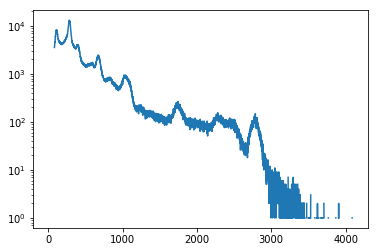

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
csv = np.genfromtxt('Thorium_102566_2019-03-28_D3S.csv', delimiter= ",").T
summed = np.sum(csv, axis=1)
plt.plot(summed)
plt.yscale('log')
plt.show()

## Finding peaks with tryPeakfinder.py

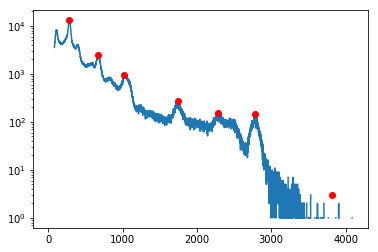

In [2]:
#tryPeakfinder Channels:
pfc = [282, 672, 1019, 1745, 2280, 2786, 3817]
plt.plot(summed)
plt.plot(pfc, summed[pfc], 'ro')
plt.yscale('log')
plt.show()

## Referencing data from uranium_calibration.py (for det 1) and plotting the Th curve for det 2

[  2.45788145e-01   2.18803415e+02   9.96805125e-05]


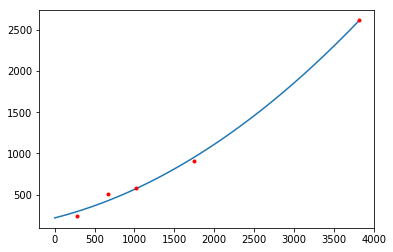

In [3]:
#Imported code from uranium_calibration.py
from scipy.optimize import curve_fit

channels = pfc[0:4] + [pfc[-1]] #= [282, 672, 1019, 1745, 2280??remove, 2786??remove, 3817]
energies = [238.6, 510.8, 583.1, 911.1, 2614.7]


#Th_channels = [390, 925, 3666]
#Th_energies = [238.6, 583.1, 2614.7]


def polyfit(x, m, b, r):
    return r * x*x + m*x + b
p0 = [1, .6, 2]
xpopt, xpcov = curve_fit(polyfit, channels, energies, p0)
print(xpopt)
plt.plot(polyfit(range(max(channels)), *xpopt))
plt.plot(channels, energies, 'r.')
plt.show()

The maginitude of terms seems in line with det 1

## Now let's import uranium data for det 2

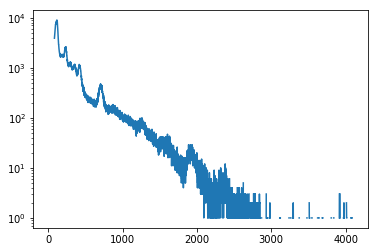

In [4]:
csv_u = np.genfromtxt('Uranium_102566_2019-03-28_D3S.csv', delimiter= ",").T
summed_u = np.sum(csv_u, axis=1)
plt.plot(summed_u)
plt.yscale('log')
plt.show()

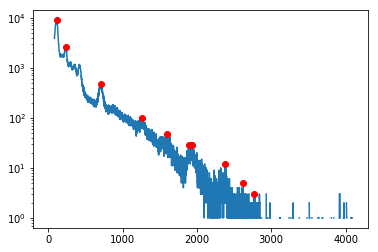

In [8]:
#from tryPeakfinder.ipynb:
pfc_u = [118, 232, 704, 1260, 1604, 1888, 1913, 1935, 2380, 2624, 2762]
plt.plot(summed_u)
plt.plot(pfc_u, summed_u[pfc_u], 'ro')
plt.yscale('log')
plt.show()

## Plotting combined calibration data for detector 1

[  5.80899642e-01   4.97812684e+00   3.56962797e-05]


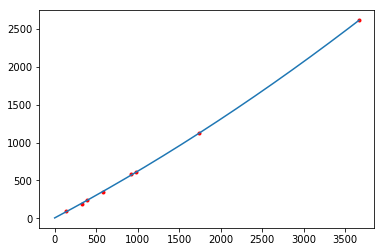

In [9]:
#from detector 1:
channels = [1741, 980, 583, 324, 139] + [390, 925, 3666]
energies = [1120.3, 609.3, 352, 185.7, 92.6] + [238.6, 583.1, 2614.7]
plt.plot(channels, energies, 'r.')
p0 = [1, .6, 2]
xpopt, xpcov = curve_fit(polyfit, channels, energies, p0)
print(xpopt)
plt.plot(polyfit(range(max(channels)), *xpopt))
plt.show()

## Plotting combined calibration for det 2:

[  3.99408626e-01   9.99865385e+01   6.78567911e-05]


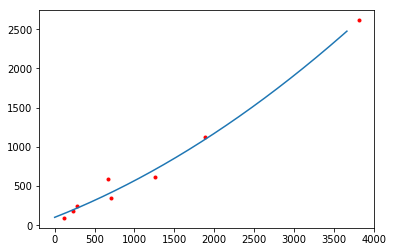

In [14]:
#from det 2:
channels_d2 = [1888, 1260, 704, 232, 118] + [282, 672, 3817]
plt.plot(channels_d2, energies, 'r.')
p0 = [1, .6, 2]
xpopt_2, xpcov_2 = curve_fit(polyfit, channels_d2, energies, p0)
print(xpopt_2)
plt.plot(polyfit(range(max(channels)), *xpopt_2))
plt.show()

# I wrote polyfit to return in the order of "m, b, r", which corresponds to "p1, p0, p2" for some stupid reason. 